In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("Significant_Features_Preliminary_Boxplot_Prep_Cohort1_C8_Heart.csv")

head(df)

,ATTRIBUTE_Group_number,X373.1826_3.18_56,X153.0405_0.36_315,X161.0919_0.32_127,X325.2191_3.04_186,X511.3737_3.12_263,X256.1902_2.85_154,X438.2068_2.82_256,X211.0785_2.88_399,X268.1036_0.34_74,X440.3363_3.29_72,X478.2168_3.21_173,X302.3047_2.85_3778,X338.3412_3.58_5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Group1,0.006640491,0.000931060,0.002289523,0.005071626,0.003185624,0.006688267,0.001408154,0.000797428,0.001992697,0.01718713,0.003110803,0,0.01847105
2,Group1,0.006299344,0.000479071,0.001875588,0.004262437,0.002303382,0.005416939,0.000562030,0.000000000,0.001819297,0.01417523,0.002845039,0,0.03297473
3,Group1,0.006953301,0.000000000,0.003051390,0.004474352,0.002982152,0.006166728,0.001138919,0.000000000,0.000697424,0.01582914,0.003285535,0,0.03136459
4,Group1,0.005331010,0.000456508,0.002977901,0.004973992,0.003113843,0.006018647,0.001148272,0.000454055,0.000678396,0.01725788,0.003440244,0,0.02943557
5,Group2,0.006326121,0.000389705,0.002801473,0.004597185,0.002788813,0.005600116,0.000691617,0.000514492,0.001601314,0.01539983,0.002572310,0,0.02807980
6,Group2,0.014686114,0.000459261,0.004677486,0.004784785,0.003862115,0.006310213,0.000922547,0.000602132,0.000441980,0.01807820,0.002543036,0,0.03664653


In [3]:
#Reorganizing data
data_long <- df%>%
    pivot_longer(
        cols = -ATTRIBUTE_Group_number,
        names_to = "Feature",
        values_to = "Value",
    )

In [4]:
#I want to make Group1 first and Group3 last so we can see the differences
data_long$ATTRIBUTE_Group_number <- factor(
    data_long$ATTRIBUTE_Group_number,
    levels = c("Group1", setdiff(unique(data_long$ATTRIBUTE_Group_number), c("Group1", "Group3")), "Group3")
)

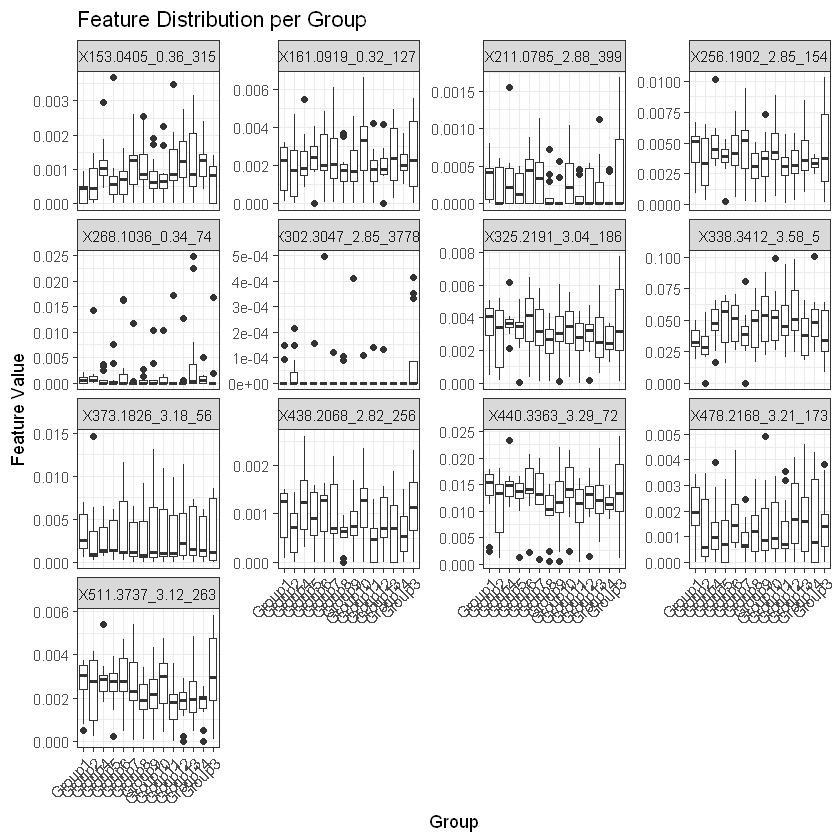

In [5]:
ggplot(data_long, aes(x = ATTRIBUTE_Group_number, y = Value)) +
  geom_boxplot() +
  facet_wrap(~Feature, scales = "free_y") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Group", y = "Feature Value", title = "Feature Distribution per Group")

In [6]:
unique_features <- unique(data_long$Feature)

In [7]:
for (feature in unique_features) {
  p <- ggplot(data_long %>% filter(Feature == feature), aes(x = ATTRIBUTE_Group_number, y = Value)) +
    geom_boxplot() +
    theme_bw() +
    labs(title = feature, x = "Group", y = "Value") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Sanitize feature name to be a safe filename
  file_name <- gsub("[^A-Za-z0-9_]", "_", feature)
  
  # Save PNG to current working directory
  ggsave(filename = paste0(file_name, ".png"), plot = p, width = 6, height = 4, dpi = 300)
}